In [1]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/labeled_data.csv")

In [4]:
data = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [5]:
data["PART_NAME"].unique()

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

In [6]:
cn7 = data[(data["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (data["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")].copy()

In [7]:
cn7 = cn7.drop(columns=["PART_NAME"])

In [8]:
cn7 = cn7.replace('Y', 1).replace('N', 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3812\472150907.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7 = cn7.replace('Y', 1).replace('N', 0)


In [9]:
cn7 = cn7[["Average_Back_Pressure", "Max_Back_Pressure", "Clamp_Close_Time", "Max_Injection_Pressure", "Max_Injection_Speed", "Plasticizing_Position", "PassOrFail"]]

[1 0]


ValueError: Could not interpret value `Injection_Time` for `x`. An entry with this name does not appear in `data`.

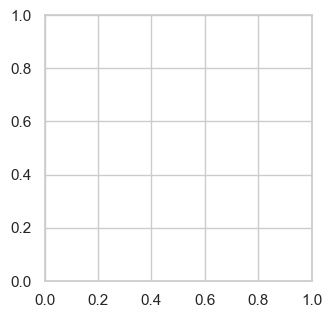

In [10]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PassOrFail 열 값 확인
print(rg3['PassOrFail'].unique())  # 고유값 확인


# 컬럼 리스트 가져오기 (PassOrFail 제외)
columns = [
    "Injection_Time", "Filling_Time", "Plasticizing_Time", "Cycle_Time",
    "Clamp_Close_Time", "Plasticizing_Position",
    "Clamp_Open_Position", "Max_Injection_Speed", "Max_Screw_RPM",
    "Average_Screw_RPM", "Max_Injection_Pressure", "Max_Switch_Over_Pressure",
    "Max_Back_Pressure", "Average_Back_Pressure", "Barrel_Temperature_1",
    "Barrel_Temperature_2", "Barrel_Temperature_3", "Barrel_Temperature_4",
    "Barrel_Temperature_5", "Barrel_Temperature_6", "Hopper_Temperature",
    "Mold_Temperature_3", "Mold_Temperature_4"
]

# 그래프 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# 각 변수에 대해 서브플롯 생성
for i, col in enumerate(columns):
    plt.subplot(5, 5, i + 1)  # 5x5 그리드로 서브플롯 생성
    sns.histplot(
        data=rg3, x=col, hue="PassOrFail", multiple="stack",
        palette={0: 'red', 1: 'blue'}, kde=False, bins=30
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# 전체 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


In [ ]:
sns.histplot(
    data=cn7, x="Injection_Time", hue="PassOrFail", multiple="stack",
    palette={0: 'red', 1: 'blue'}, kde=False, bins=30
)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

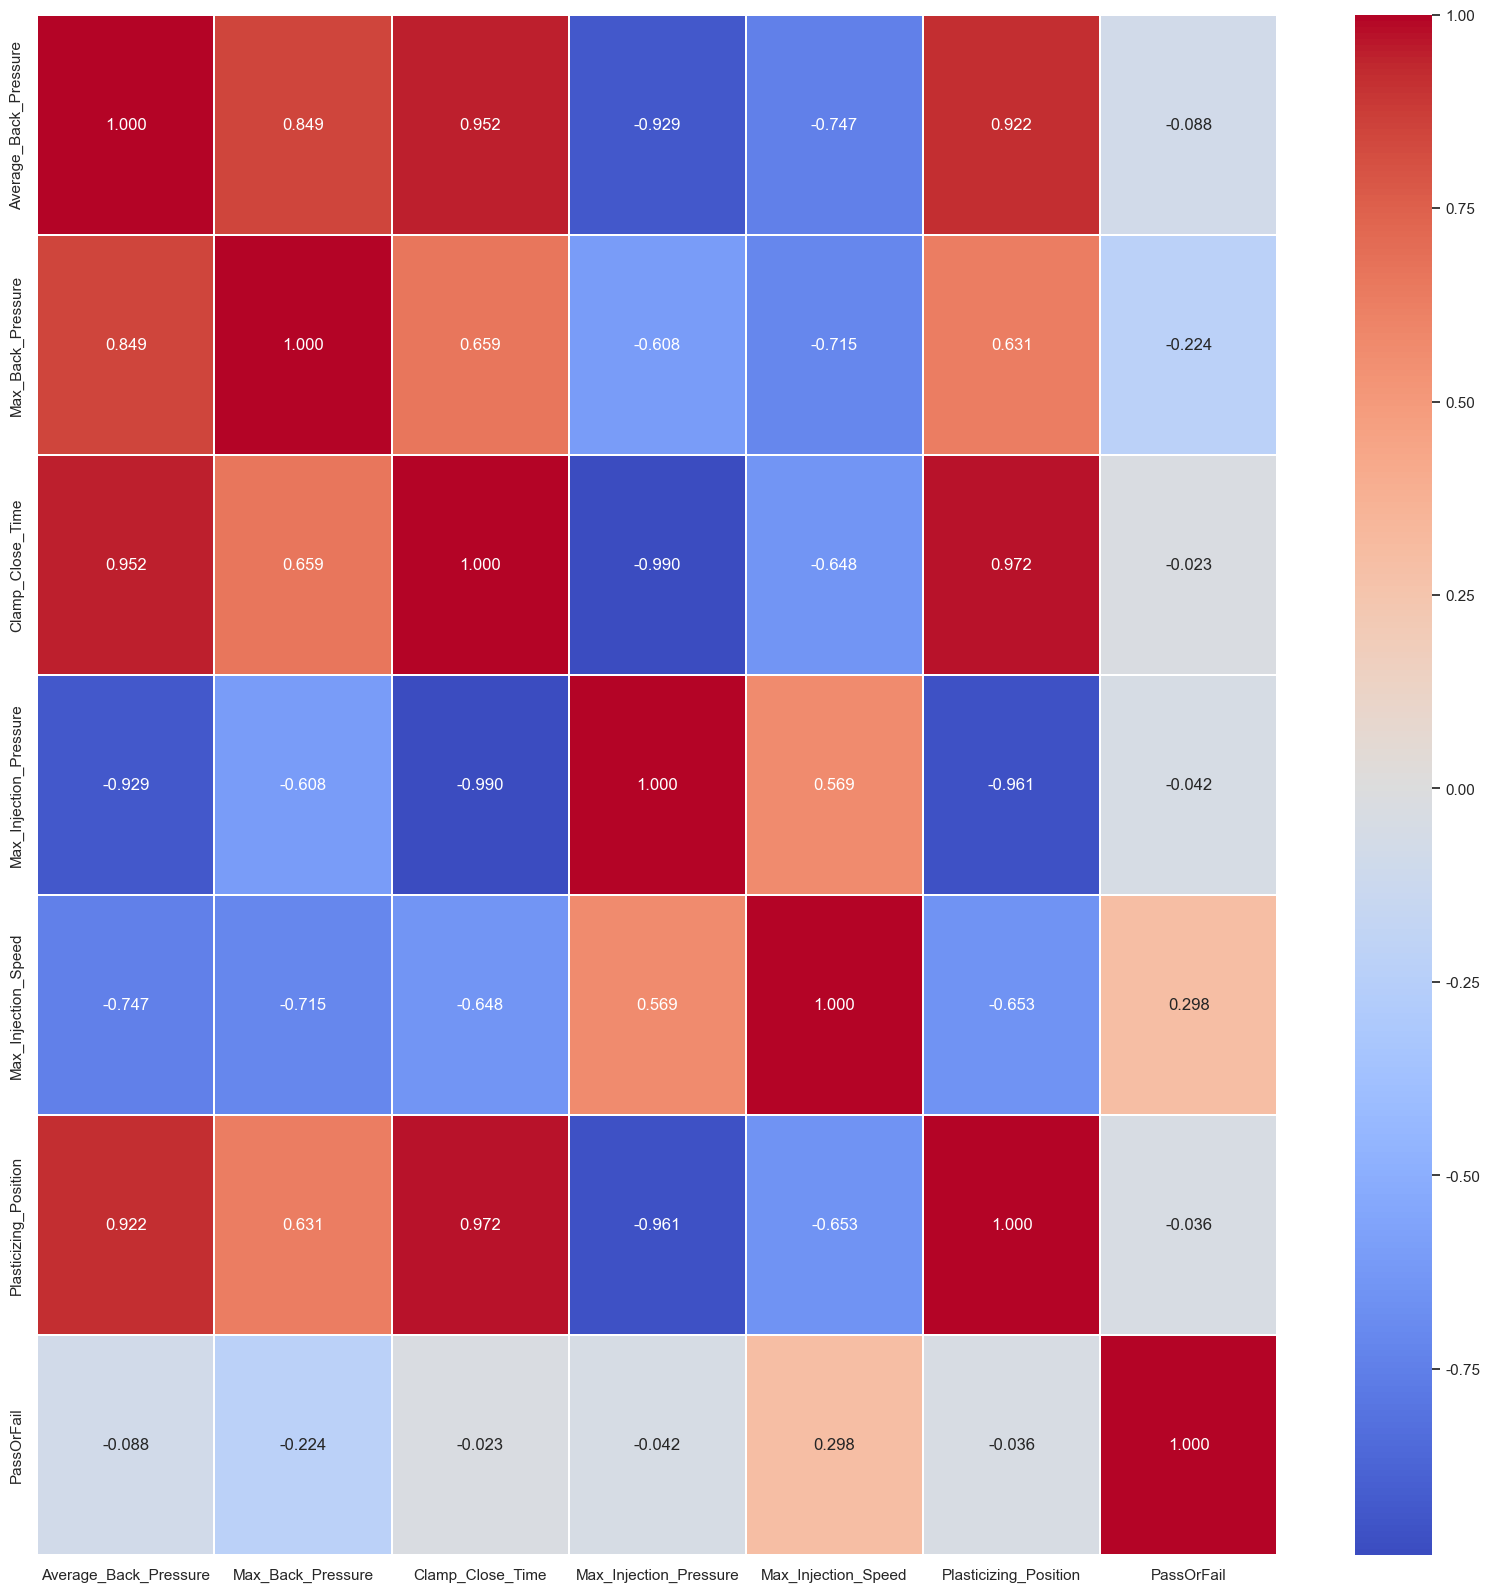

In [11]:
plt.figure(figsize=(20,20))
### 히트맵 시각화
sns.heatmap(cn7.corr(), annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.3)
# 그리기
plt.show()

In [12]:
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4715, 6) (2021, 6)
(4715,) (2021,)


In [15]:
from imblearn.over_sampling import SMOTE
# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 결과 확인
print("원본 데이터 분포:\n", y_train.value_counts())
print("SMOTE 적용 후 데이터 분포:\n", pd.Series(y_resampled).value_counts())

원본 데이터 분포:
 PassOrFail
1    4687
0      28
Name: count, dtype: int64
SMOTE 적용 후 데이터 분포:
 PassOrFail
1    4687
0    4687
Name: count, dtype: int64


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_train_re, X_val_re, y_train_re, y_val_re = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

ss=StandardScaler()
ss.fit(X_train_re)

X_train_re_scaled = ss.transform(X_train_re)
X_val_re_scaled = ss.transform(X_val_re)
X_test_re_scaled = ss.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

grid_df = pd.DataFrame()
# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_scaled, y_train)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    pre = precision_score(y_val, val_pred)
    rec = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, str(grid_search_model.best_params_)]],
                             columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "파라미터"])
    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
grid_df

,모델명,훈련_정확도,검증_정확도,정밀도,재현율,f1-score,훈련-검증,파라미터
0,RandomForestClassifier,0.999091,0.996466,0.996441,1.000000,0.998217,0.002624,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
1,ExtraTreesClassifier,0.999091,0.997880,0.997862,1.000000,0.998930,0.001211,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
2,GradientBoostingClassifier,0.999394,0.996466,0.997859,0.998571,0.998215,0.002928,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
3,HistGradientBoostingClassifier,0.999394,0.996466,0.997859,0.998571,0.998215,0.002928,"{'max_depth': 50, 'max_iter': 20, 'min_samples..."
4,XGBClassifier,0.999091,0.997880,0.997862,1.000000,0.998930,0.001211,"{'max_depth': 10, 'min_child_weight': 1, 'n_es..."


In [19]:
grid_df["파라미터"][1]

"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}"

In [20]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)
model.fit(X_train_scaled, y_train)

# val_pre = model.predict(X_val_scaled)
test_pre = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pre)


array([[   4,    7],
       [   2, 2008]], dtype=int64)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

grid_df = pd.DataFrame()
# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_re_scaled, y_train_re)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_re_scaled)
    val_pred = model.predict(X_val_re_scaled)
    
    train_acc = accuracy_score(y_train_re, train_pred)
    val_acc = accuracy_score(y_val_re, val_pred)
    
    pre = precision_score(y_val_re, val_pred)
    rec = recall_score(y_val_re, val_pred)
    f1 = f1_score(y_val_re, val_pred)
    df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, str(grid_search_model.best_params_)]],
                             columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "파라미터"])
    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
grid_df

,모델명,훈련_정확도,검증_정확도,정밀도,재현율,f1-score,훈련-검증,파라미터
0,RandomForestClassifier,0.999848,0.997512,0.997874,0.997167,0.997520,0.002336,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
1,ExtraTreesClassifier,0.999848,0.996801,0.997871,0.995751,0.996810,0.003047,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,GradientBoostingClassifier,0.999848,0.996801,0.996461,0.997167,0.996814,0.003047,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
3,HistGradientBoostingClassifier,0.999848,0.996801,0.997871,0.995751,0.996810,0.003047,"{'max_depth': 10, 'max_iter': 50, 'min_samples..."
4,XGBClassifier,0.999848,0.996801,0.997871,0.995751,0.996810,0.003047,"{'max_depth': 20, 'min_child_weight': 1, 'n_es..."


In [22]:
grid_df["파라미터"][1]

"{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}"

In [23]:
model = ExtraTreesClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20)
model.fit(X_train_re_scaled, y_train_re)

test_pre = model.predict(X_test_re_scaled)
# test_pre = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pre)


array([[   5,    6],
       [  11, 1999]], dtype=int64)

In [ ]:
cn7.columns

In [ ]:
col = "Plasticizing_Time"
sns.histplot(
    data=cn7, x=col, hue="PassOrFail", multiple="stack",
    palette={0: 'red', 1: 'blue'}, kde=False, bins=30
)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

In [ ]:
cn7[cn7["Plasticizing_Time"] > 5]["Filling_Time"].value_counts()

In [ ]:
# 제거 injection_time, Filling_Time

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cn7)

# 1. 데이터 준비 (예제 데이터 생성)

# 2. 5개의 변수 선택 (예: Feature1, Feature2, Feature3, Feature4, Feature5)
selected_features = ['Max_Switch_Over_Pressure', 'Barrel_Temperature_3', 'Barrel_Temperature_5', 'Hopper_Temperature']
data_selected = cn7[selected_features]

data_scaled = scaler.fit_transform(data_selected)

# 4. PCA 적용
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_selected)

pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
print("PCA 결과:")
print(pca_df)

# 5. 주성분별 분산 설명력 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분별 분산 설명력:", explained_variance_ratio)

# 결과 출력
print("PCA 변환 후 데이터 (첫 5개 샘플):")
print(data_pca[:5])

KeyError: "None of [Index(['Max_Switch_Over_Pressure', 'Barrel_Temperature_3',\n       'Barrel_Temperature_5', 'Hopper_Temperature'],\n      dtype='object')] are in the [columns]"

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
cn7.info()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 전처리
data = cn7
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 회귀 모델 학습
model = LinearRegression()
model.fit(X_scaled, y)

# 3. 독립변수 기여도 계산 (회귀 계수의 절대값 기준)
coefficients = model.coef_
feature_names = X.columns  # 컬럼명 가져오기

# 기여도 계산 및 정렬
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# 4. 기여도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), importance[sorted_idx], tick_label=np.array(feature_names)[sorted_idx])
plt.title('독립변수의 종속변수에 대한 기여도')
plt.xlabel('독립변수')
plt.ylabel('기여도 (절대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
cn7.columns

In [ ]:
# PCA 로딩 계산
loading_matrix = pd.DataFrame(pca.components_, columns=features.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])

# 가장 영향력이 큰 변수 확인 (PC1 기준)
most_influential_features_pc1 = loading_matrix.loc["PC1"].abs().sort_values(ascending=False)
print("PC1에서 가장 영향력이 큰 변수들:")
print(most_influential_features_pc1.head())
